In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GM
from scipy import stats


In [6]:
with open('PCRsforR.csv') as f:
    lines = f.readlines()
    

In [13]:
split_lines = [line.strip().split(',') for line in lines]

split_lines = split_lines[2:]

print(len(split_lines))


base_pair_counts = [int(round(float(x[0]))) for x in split_lines]
x = base_pair_counts

586


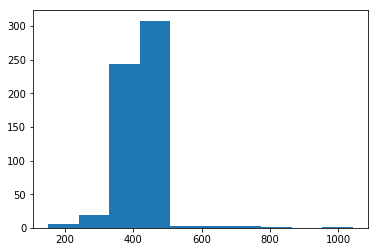

In [14]:
plt.hist(x)
plt.show()

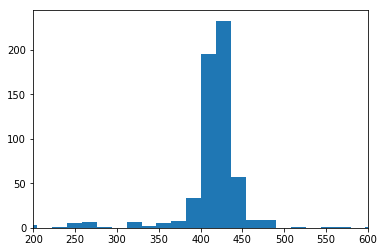

In [52]:
plt.hist(x, bins=50)
plt.xlim(200,600)
plt.show()

In [28]:
x = x.reshape(-1)

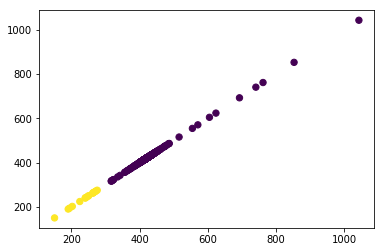

In [46]:

gmm = GM(n_components=2).fit(x.reshape(-1,1))
labels = gmm.predict(x.reshape(-1,1))
plt.scatter(x, x, c=labels, s=40, cmap='viridis')
plt.show()


In [56]:
two_cluster_gmm = gmm
two_cluster_labels = labels


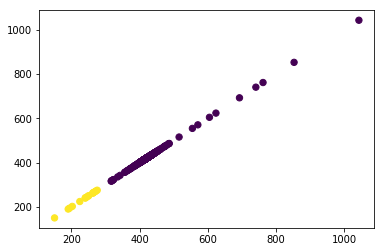

-5.380976626080651


In [61]:
plt.scatter(x, x, c=two_cluster_labels, s=40, cmap='viridis')
plt.show()
print(two_cluster_gmm.score(x.reshape(-1,1)))

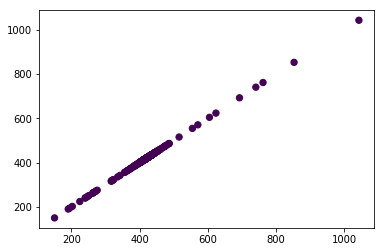

In [59]:
one_cluster_gmm = GM(n_components=1).fit(x.reshape(-1,1))
one_cluster_labels = one_cluster_gmm.predict(x.reshape(-1,1))


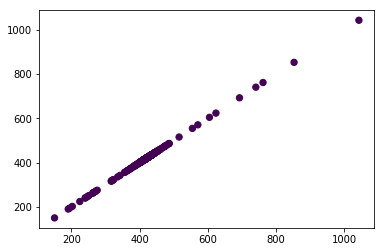

-5.440164844730977


In [62]:
plt.scatter(x, x, c=one_cluster_labels, s=40, cmap='viridis')
plt.show()
print(one_cluster_gmm.score(x.reshape(-1,1)))

In [65]:
log_prob1 = one_cluster_gmm.score(x.reshape(-1,1))
log_prob2 = two_cluster_gmm.score(x.reshape(-1,1))

lambda1 = log_prob1*len(x)
lambda2 = log_prob2*len(x)

diff = lambda1-lambda2
chisq = diff*-2

stats.chi2.pdf(chisq,3)

2.872718616632889e-15

Compare two models under:
Null hypothesis: all data comes from single normal distribution.
Alternative hypothesis: data comes from mixture of gaussians with two peaks: one for main chunk of data, and xx% for the lower numbers

Assumptions to explain:
Why is the distribution of added/deleted base pairs approx. normal?
Why should there be a small peak in the smaller numbers? What is the mechanism? What should the percentage be?

Comparing the hypotheses: likelihood ratio test (uniformly most powerful, common choice for arbitrary nested pairs of hypotheses.

Here, we take a mixture of two gaussians
Under alternative hypothesis, we have mu1, sigma1, mu2, sigma2, and lambda1 (weight given to first Gaussian - second gets 1-lambda1)

Under null hypothesis, we set lambda1 = 1, ignore mu2 and sigma2
So we go from 5 to 2 parameters

Taking the mean log likelihood of the data under the two models, -2*(their difference) gives us a random variable distributed as chi squared of (5-2 = 3 diff in params)
The value of this ratio under chisq(3) gives a p value of 2.872718616632889e-15

